In [ ]:
## UVvisNIR film wise

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Wavelength	100%T	0%T	A1_Sealed	A3_Sealed	A7_Sealed	A14_Sealed	A21_Sealed	A39_Sealed							

# Wavelength	0%T	100%T	DF_WithoutTexture_1	DF_WithTexture	DF_Textured_Sample	Sample_WithoutSeal	DF_WithoutTexture_2	OnlyS_WithoutTexture	OnlyS_WithTexture	Test_7_Without


headers = ['Wavelength','0%T','100%T','DF_WithoutTexture_1','DF_WithTexture','DF_Textured_Sample','Sample_WithoutSeal','DF_WithoutTexture_2', 'OnlyS_WithoutTexture', 'OnlyS_WithTexture', 'Test_7_Without']


#df = pd.read_csv(r'C:\Users\user\Desktop\Vac_Seal\IdealSample\IdealSample_WithS_UVvisNIR.csv', names=headers, skiprows=[0])


## C:\Users\user\Desktop\Vac_Seal

# C:\Users\user\Desktop\Vac_Seal\aerogel_uvvis
df= pd.read_csv(r'C:\Users\user\Desktop\Vac_Seal\Film_Texture_Plain_Sample.csv', names=headers, skiprows=[0])

df = df.fillna(0)
df = df.astype(int)

df

,Wavelength,0%T,100%T,DF_WithoutTexture_1,DF_WithTexture,DF_Textured_Sample,Sample_WithoutSeal,DF_WithoutTexture_2,OnlyS_WithoutTexture,OnlyS_WithTexture,Test_7_Without
0,2500,111,-1,60,60,13,32,78,77,76,58881
1,2499,111,1,58,56,12,29,76,77,78,10
2,2498,112,0,60,59,11,31,77,75,76,10
3,2497,112,2,58,55,11,29,76,74,76,9
4,2496,113,0,59,58,13,31,75,76,75,9
...,...,...,...,...,...,...,...,...,...,...,...
2197,303,78,-1,41,85,-15,64,76,80,82,-20
2198,302,77,1,37,78,-37,60,73,78,80,5
2199,301,78,0,50,79,-32,62,74,76,81,10
2200,300,78,-4,43,64,2,79,72,76,81,-9


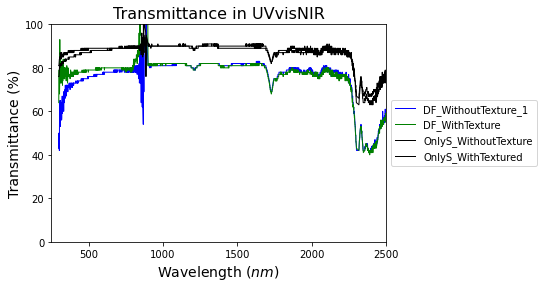

Text(0.5, 1.0, 'Wavelength vs Transmittance')

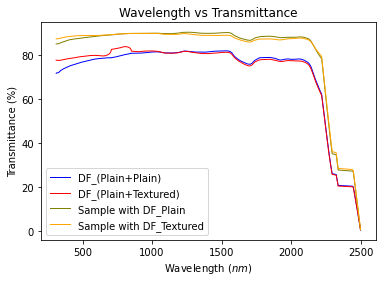

In [39]:
#plt.plot(df['Wavelength'], df['100%T'], '-',color='red', label='100%T', lw=1)
#plt.plot(df['Wavelength'], df['0%T'], '-', color='blue', label='0%T', lw=1)
plt.plot(df['Wavelength'], df['DF_WithoutTexture_1'], '-', color='blue', label='DF_WithoutTexture_1', lw=1)
plt.plot(df['Wavelength'], df['DF_WithTexture'], '-', color='green', label='DF_WithTexture', lw=1)
#plt.plot(df['Wavelength'], df['DF_Textured_Sample'], '-', color='purple', label='DF_Textured_Sample', lw=1)
#plt.plot(df['Wavelength'], df['Sample_WithoutSeal'], '-', color='yellow', label='Sample_WithoutSeal', lw=1)
# plt.plot(df['Wavelength'], df['DF_WithoutTexture_2'], '-', color='orange', label='DF_WithoutTexture_2', lw=1)
plt.plot(df['Wavelength'], df['OnlyS_WithoutTexture'], '-', color='black', label='OnlyS_WithoutTexture', lw=1)

plt.plot(df['Wavelength'], df['OnlyS_WithTexture'], '-', color='black', label='OnlyS_WithTextured', lw=1)
# plt.plot(df['Wavelength'], df['OnlyS_WithoutTexture'], '-', color='black', label='OnlyS_WithoutTexture', lw=1)





plt.title('Transmittance in UVvisNIR', fontdict={'fontsize': 16})
plt.xlabel('Wavelength ($nm$)', fontdict={'fontsize': 14} )
plt.ylabel('Transmittance (%)', fontdict={'fontsize': 14})
plt.xticks(np.arange(0, 2501, 500))
plt.xlim([250, 2500])
plt.ylim([0, 100])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.legend(loc='best', bbox_to_anchor=(0.03, 0.4))
plt.savefig('trans_ald_effect.jpeg', format='jpeg', dpi=1000)
plt.show()

# plt.xlabel('Wavelength ($nm$)')
# plt.ylabel('Transmittance (%)')
# plt.xticks(np.arange(0, 2501, 500))
# plt.xlim([250, 2199])
# plt.ylim([-10, 140])
# plt.legend(loc='best')
# plt.text(1000, 50, 'as-is height')
# plt.savefig('211130_tmos_A72T_A73T_A74T_A31T_A11T - Copy.csv', format='jpeg', dpi=1000)
# plt.show()


# block added from stackoverflow

from scipy import stats
from scipy.signal import lfilter

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

n = 145  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
x = df['Wavelength']
yy = lfilter(b,a,df['DF_WithoutTexture_1'])
uu = lfilter(b,a,df['DF_WithTexture'])
zz = lfilter(b,a,df['OnlyS_WithoutTexture'])
kk = lfilter(b,a,df['OnlyS_WithTexture'])
mm = lfilter(b,a,df['DF_WithoutTexture_2'])

plt.plot(x, yy, '-', color='blue', label='DF_(Plain+Plain)', lw=1)
plt.plot(x, uu, '-', color='red', label='DF_(Plain+Textured)', lw=1)
plt.plot(x, zz, '-', color='olive', label='Sample with DF_Plain', lw=1)
plt.plot(x, kk, '-', color='orange', label='Sample with DF_Textured', lw=1)
#plt.plot(x, mm, '-', color='purple', label='DF_(Plain+Texture)', lw=1)


plt.xlabel('Wavelength ($nm$)')
plt.ylabel('Transmittance (%)')
plt.legend(loc='best')
plt.title('Wavelength vs Transmittance', loc='center')
# plt.plot(x, yy, linewidth=2, linestyle="-", c="b")  # smooth by filter



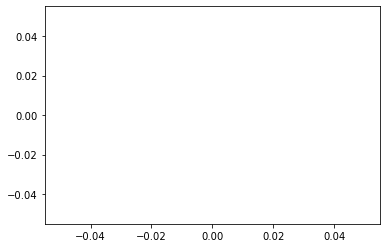

In [14]:
#plt.plot(df['Wavelength'], df['100%T'], '-',color='red', label='100%T', lw=1)
#plt.plot(df['Wavelength'], df['0%T'], '-', color='blue', label='0%T', lw=1)
plt.plot(df['Wavelength'], df['DF_WithoutTexture_1'], '-', color='blue', label='DF_WithoutTexture_1', lw=1)
plt.plot(df['Wavelength'], df['DF_WithTexture'], '-', color='green', label='DF_WithTexture', lw=1)
plt.plot(df['Wavelength'], df['DF_Textured_Sample'], '-', color='purple', label='DF_Textured_Sample', lw=1)
plt.plot(df['Wavelength'], df['Sample_WithoutSeal'], '-', color='yellow', label='Sample_WithoutSeal', lw=1)
plt.plot(df['Wavelength'], df['DF_WithoutTexture_2'], '-', color='orange', label='DF_WithoutTexture_2', lw=1)
plt.plot(df['Wavelength'], df['OnlyS_WithoutTexture'], '-', color='black', label='OnlyS_WithoutTexture', lw=1)

plt.plot(df['Wavelength'], df['OnlyS_WithTexture'], '-', color='black', label='OnlyS_WithTextured', lw=1)
plt.plot(df['Wavelength'], df['OnlyS_WithoutTexture'], '-', color='black', label='OnlyS_WithoutTexture', lw=1)
